In [1]:
import h5py
import numpy as np
import glob2
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd

sns.set(style="ticks")

/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [24]:
# All params
Q_list = [0.15]
W_list = [0.15]
D_list = [0.6]
T_list = [0.00001, 0.0001, 0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0]
decay_list = [18.0]

wb_list = [5.0]

seed_list = list(np.arange(0, 25))

## Plot scenting

In [35]:
n = 140
filename = f"scenting_data/wb={int(wb_list[0])}/state_data_{n}.json"
savename = f"scenting_data/wb={int(wb_list[0])}/state_data_n={n}"
filename, savename

('scenting_data/wb=5/state_data_140.json',
 'scenting_data/wb=5/state_data_n=140')

In [36]:
with open(filename) as f:
    scenting_data = json.load(f)

#### Scenting for all trials

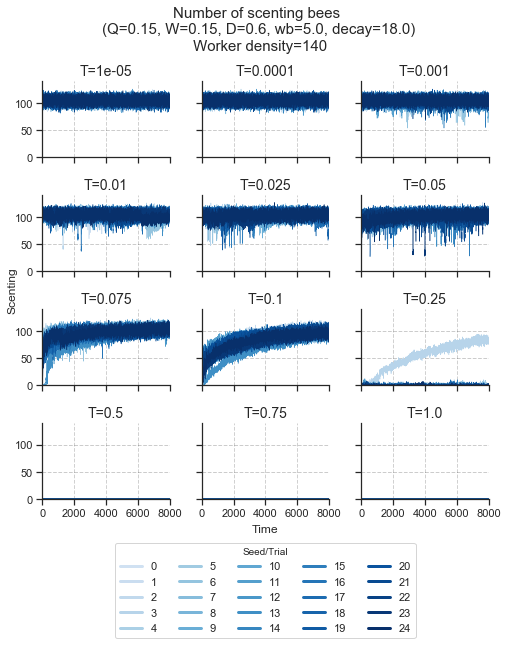

In [37]:
plt.rcParams["font.family"] = "Arial"
fig, axes = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(8, 8))

colors = plt.cm.Blues(np.linspace(0.2, 1, len(seed_list)))

axes = axes.flatten()
for data_i, (ax, data) in enumerate(zip(axes, scenting_data)):
    for trial_i, trials in enumerate(scenting_data[data]):
        trials_list = scenting_data[data][trials]
        
        ax.plot(trials_list, label=f"{seed_list[trial_i]}",
               color=colors[trial_i], linewidth=0.5) 
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(f"T={T_list[data_i]}", fontsize=14)
        ax.xaxis.grid(b=True, color='k', alpha=0.2, linestyle='--', linewidth=1)
        ax.yaxis.grid(b=True, color=(0,0,0), alpha=0.2, linestyle='--', linewidth=1)
        ax.yaxis.zorder = -1
        plt.ylim(0, n)
        plt.xlim(0, len(trials_list))
        plt.xticks(np.arange(0, len(trials_list)+1, 2000))

fig.suptitle(f"Number of scenting bees \n (Q={Q_list[0]}, W={W_list[0]}, D={D_list[0]}, wb={wb_list[0]}, decay={decay_list[0]}) \n Worker density={n}", fontsize=15)
fig.subplots_adjust(top=0.85)   

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
leg = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -0.5),
          fancybox=True, shadow=False, ncol=5, title="Seed/Trial")  
for line in leg.get_lines():
    line.set_linewidth(3)
    
# Add x and y labels for all
ax = fig.add_subplot(111, frameon=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Time', labelpad=25) 
ax.set_ylabel('Scenting', labelpad=25)

fig.subplots_adjust(wspace=0.25, hspace=0.5)

# Save figures
plt.savefig(f"{savename}.pdf", bbox_inches='tight')
plt.savefig(f"{savename}.png", bbox_inches='tight')

### Avg scenting for sets of params

In [38]:
# Plot mean of scentings for each set of params
means_dict = {}
for data_i, data in enumerate(scenting_data):
    means = []
    for trial_i, trials in enumerate(scenting_data[data]):
        means.append(scenting_data[data][trials])
    means_array = np.mean(np.array(means), axis=0)

    means_dict[data] = means_array

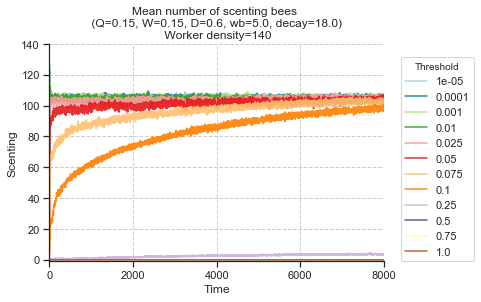

In [39]:
means_colors = plt.cm.Paired(np.linspace(0, 1, len(means_dict)))

for set_i, set_params in enumerate(means_dict):
    plt.plot(means_dict[set_params], label=f"{T_list[set_i]}",
             color=means_colors[set_i], alpha=0.9)

ax = plt.gca()
ax.xaxis.grid(b=True, color='k', alpha=0.2, linestyle='--', linewidth=1)
ax.yaxis.grid(b=True, color=(0,0,0), alpha=0.2, linestyle='--', linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(-1, n)
plt.xlim(0, len(trials_list))
plt.xticks(np.arange(0, len(trials_list)+1, 2000))
plt.xlabel('Time')
plt.ylabel('Scenting')
plt.legend(loc=(1.05,0), title="Threshold")

plt.title(f'Mean number of scenting bees \n (Q={Q_list[0]}, W={W_list[0]}, D={D_list[0]}, wb={wb_list[0]}, decay={decay_list[0]}) \n Worker density={n}')
plt.savefig(f"{savename}_overall.pdf", bbox_inches='tight')
plt.savefig(f"{savename}_overall.png", bbox_inches='tight')

plt.show()
